<a href="https://colab.research.google.com/github/1504raghavnama/Stock-Market-Price-Prediction/blob/main/Stock_Market_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%pip install yfinance

# **Loading the dataset**

In [ ]:
import yfinance as yf

# Choose a stock ticker symbol
ticker_symbol = 'RELIANCE.NS'

# Define the start and End date
start_date = '1996-01-01'
end_date = '2025-10-14'

#Download the historical data
stock_data = yf.download(ticker_symbol, start=start_date, end=end_date)

# Display the first few rows of the dataframe
display(stock_data.tail())

/tmp/ipython-input-3601229032.py:11: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(ticker_symbol, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS
Date,,,,,
2025-10-07,1384.800049,1395.900024,1375.900024,1376.000000,11244040
2025-10-08,1367.400024,1389.000000,1364.500000,1384.800049,8525081
2025-10-09,1377.800049,1380.000000,1369.099976,1374.000000,8826633
2025-10-10,1381.699951,1388.000000,1375.099976,1377.800049,6373084
2025-10-13,1375.000000,1377.699951,1367.800049,1376.900024,7600682


In [ ]:
close_prices =stock_data['Close']
display(close_prices.head())
close_prices.info()

Ticker,RELIANCE.NS
Date,
1996-01-01,4.617048
1996-01-02,4.581145
1996-01-03,4.615927
1996-01-04,4.573291
1996-01-05,4.541875


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7478 entries, 1996-01-01 to 2025-10-13
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   RELIANCE.NS  7478 non-null   float64
dtypes: float64(1)
memory usage: 116.8 KB


In [ ]:
print(close_prices)

Ticker      RELIANCE.NS
Date                   
1996-01-01     4.617048
1996-01-02     4.581145
1996-01-03     4.615927
1996-01-04     4.573291
1996-01-05     4.541875
...                 ...
2025-10-07  1384.800049
2025-10-08  1367.400024
2025-10-09  1377.800049
2025-10-10  1381.699951
2025-10-13  1375.000000

[7478 rows x 1 columns]


# **Normalizing the features**

In [ ]:
from sklearn.preprocessing import MinMaxScaler

#Instantiate MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

#reshape the data and fit/transform
scaled_data = scaler.fit_transform(close_prices.values.reshape(-1,1))
display(scaled_data[:5])

array([[0.00073659],
       [0.00071395],
       [0.00073589],
       [0.000709  ],
       [0.00068918]])

#Convert to time stamps

In [ ]:
#Initialize empty lists for training data and lables
x_train = []
y_train = []

#Define the time stamp for sequences
time_step= 60

In [ ]:
len(scaled_data)

7478

In [ ]:
for i in range (time_step, len(scaled_data)):
  x_train.append(scaled_data[i-time_step:i,0]) #It selects a contiguous block of data points starting at index i - time_step and ending just before index i. The length of this slice is exactly time_step. This creates the historical sequence.
  y_train.append(scaled_data[i,0]) #This is indexing the scaled_data array. It selects the data point at a specific position: row i (the current time step) and column 0 (the first, and likely only, feature, which is the scaled price).

#Display the length of the created lists
print(f"length of x_train: {len(x_train)}")
print(f"length of y_train: {len(y_train)}")

length of x_train: 7418
length of y_train: 7418


# **Reshape the data**

In [ ]:
import numpy as np
x_train = np.array(x_train)

In [ ]:
x_train.shape[1]

60

In [ ]:
#convert the lists to numpy arrays
x_train = np.array(x_train)
y_train = np.array(y_train)

#Reshape the data to be 3D (samples, time_step, features)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# Converts the 2D input data (samples, time_steps) into the 3D format
# (samples, time_steps, features) required by Keras/TensorFlow for recurrent
# layers like LSTM. The '1' signifies that there is only one feature (e.g., close price).

# Print the shapes to verify
print(f"shape of x_train: {x_train.shape}")
print(f"shape of y_train: {y_train.shape}")

shape of x_train: (7418, 60, 1)
shape of y_train: (7418,)


In [ ]:
x_train.shape

(7418, 60, 1)

# **Create a sequential lstm model**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

#Initialize the sequential model
model = Sequential()

#Add the first layer
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))

#Add the second layer
model.add(LSTM(units=50, return_sequences=False))

#Add the output Dense layer
model.add(Dense(units=1))

# Print the model summary
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 60, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,651 (119.73 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
?LSTM

# **Compile the model**

In [ ]:
from tensorflow.keras.optimizers import Adam

# Compile the model
model.compile(optimizer=Adam(), loss='mean_squared_error')

# Print confirmation
print("Model compiled successfully with Adam optimizer and Mean Squared Error loss.")

Model compiled successfully with Adam optimizer and Mean Squared Error loss.


# **Train the model**

In [ ]:
print("Starting model training...")

# Train the model
history = model.fit(x_train, y_train, epochs=25, batch_size=32, validation_split=0.2)

print("Model training finished.")

Starting model training...
Epoch 1/25
186/186 ━━━━━━━━━━━━━━━━━━━━ 15s 59ms/step - loss: 0.0011 - val_loss: 0.0012
Epoch 2/25
186/186 ━━━━━━━━━━━━━━━━━━━━ 12s 63ms/step - loss: 3.6411e-05 - val_loss: 7.7787e-04
Epoch 3/25
186/186 ━━━━━━━━━━━━━━━━━━━━ 20s 60ms/step - loss: 3.6747e-05 - val_loss: 0.0012
Epoch 4/25
186/186 ━━━━━━━━━━━━━━━━━━━━ 12s 63ms/step - loss: 3.3514e-05 - val_loss: 5.1195e-04
Epoch 5/25
186/186 ━━━━━━━━━━━━━━━━━━━━ 11s 61ms/step - loss: 2.7253e-05 - val_loss: 4.4572e-04
Epoch 6/25
186/186 ━━━━━━━━━━━━━━━━━━━━ 19s 54ms/step - loss: 2.5880e-05 - val_loss: 6.7841e-04
Epoch 7/25
186/186 ━━━━━━━━━━━━━━━━━━━━ 11s 59ms/step - loss: 2.7794e-05 - val_loss: 6.1664e-04
Epoch 8/25
186/186 ━━━━━━━━━━━━━━━━━━━━ 21s 60ms/step - loss: 2.5137e-05 - val_loss: 0.0011
Epoch 9/25
186/186 ━━━━━━━━━━━━━━━━━━━━ 11s 60ms/step - loss: 2.8287e-05 - val_loss: 3.1920e-04
Epoch 10/25
186/186 ━━━━━━━━━━━━━━━━━━━━ 12s 63ms/step - loss: 2.4376e-05 - val_loss: 3.4062e-04
Epoch 11/25
186/186 ━━━━━━━━

# **Predict using the test data**

In [ ]:
training_data_len = int(len(scaled_data) * 0.8)

In [ ]:
(training_data_len)

5982

In [ ]:
scaled_data1=scaled_data[training_data_len - time_step:,]

In [ ]:
len(scaled_data1)

1556

In [ ]:
# Define the split point for training and testing data
training_data_len = int(len(scaled_data) * 0.8)
test_data = scaled_data[training_data_len-time_step:, :]

# Create the test dataset
X_test = []
y_test = scaled_data[training_data_len:, :]
for i in range(time_step, len(test_data)):
    X_test.append(test_data[i-time_step:i, 0])

# Convert the test data to a numpy array
X_test = np.array(X_test)

# Reshape the test data to be 3D (samples, time steps, features)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Get the model's predicted price values
predictions = model.predict(X_test)

# Print the shapes to verify
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_test: {y_test.shape}")
print(f"Shape of predictions: {predictions.shape}")

47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step
Shape of X_test: (1496, 60, 1)
Shape of y_test: (1496, 1)
Shape of predictions: (1496, 1)


# **Inverse transform the predictions**

In [ ]:
# Inverse transform the predictions to get the actual price values
predictions = scaler.inverse_transform(predictions)

# Print the first few inverse transformed predictions
display(predictions[:5])

array([[585.9909 ],
       [580.2419 ],
       [578.34424],
       [577.9323 ],
       [579.15106]], dtype=float32)

# **Visualize the results**

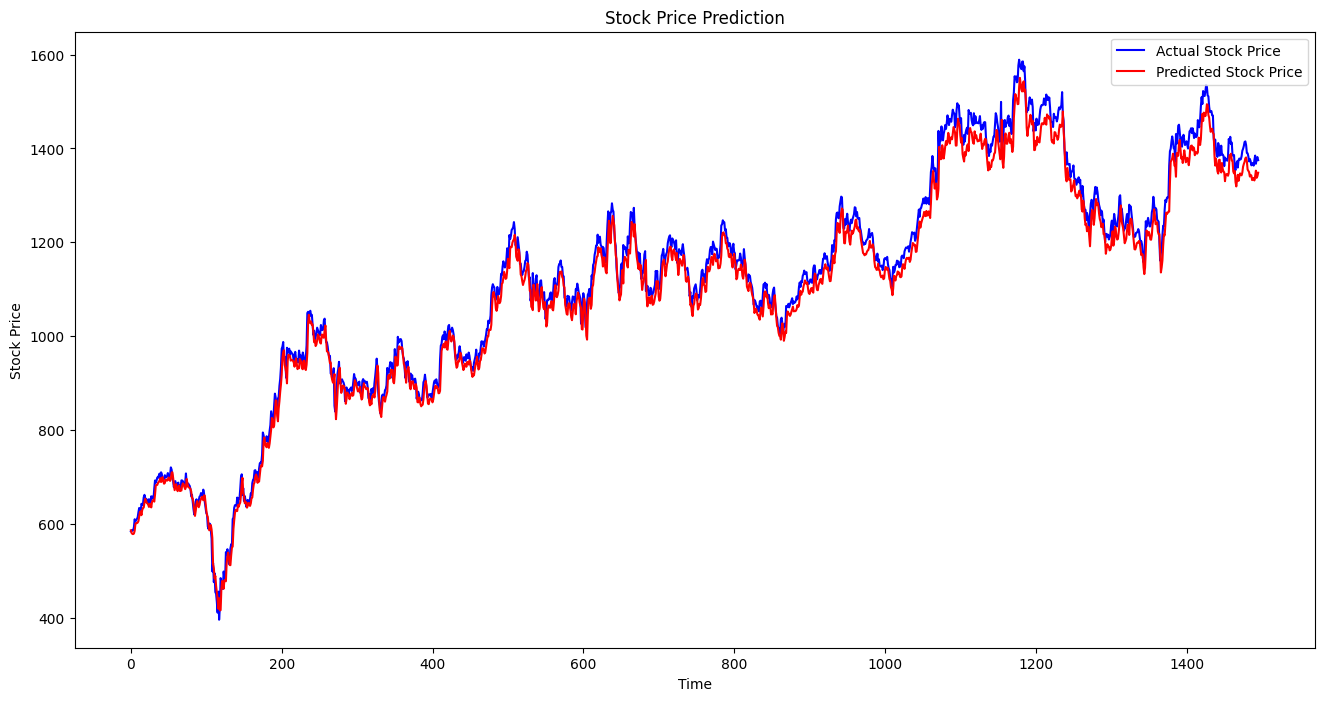

In [ ]:
import matplotlib.pyplot as plt

# Prepare data for plotting (actual prices)
# Get the original test data (unscaled)
actual_prices = scaler.inverse_transform(y_test)

# Plot the data
plt.figure(figsize=(16,8))
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.plot(actual_prices, color='blue', label='Actual Stock Price')
plt.plot(predictions, color='red', label='Predicted Stock Price')
plt.legend()
plt.show()

#Predict future values
Using the trained model to predict stock prices for the next 120 days.

Reasoning: Using the last time_step days of the training data to predict the next day's price, then append the prediction to the input sequence and repeat for 120 days.

In [ ]:
# Predict future values
future_predictions = []
# Use the last `time_step` days from the scaled data as the initial input
last_time_step_data = scaled_data[-time_step:].reshape(1, time_step, 1)

for _ in range(120):
    # Predict the next day's price
    next_day_prediction = model.predict(last_time_step_data)

    # Append the prediction to the list of future predictions
    future_predictions.append(next_day_prediction[0, 0])

    # Update the input sequence by removing the oldest value and adding the new prediction
    last_time_step_data = np.append(last_time_step_data[:, 1:, :], next_day_prediction.reshape(1, 1, 1), axis=1)

# Inverse transform the future predictions
future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

# Print the first few future predictions
print("Future predictions for the next 120 days:")
display(future_predictions[:5])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━

array([[1343.2615],
       [1311.6874],
       [1276.8373],
       [1243.7878],
       [1213.8525]], dtype=float32)

# Visualize future predictions

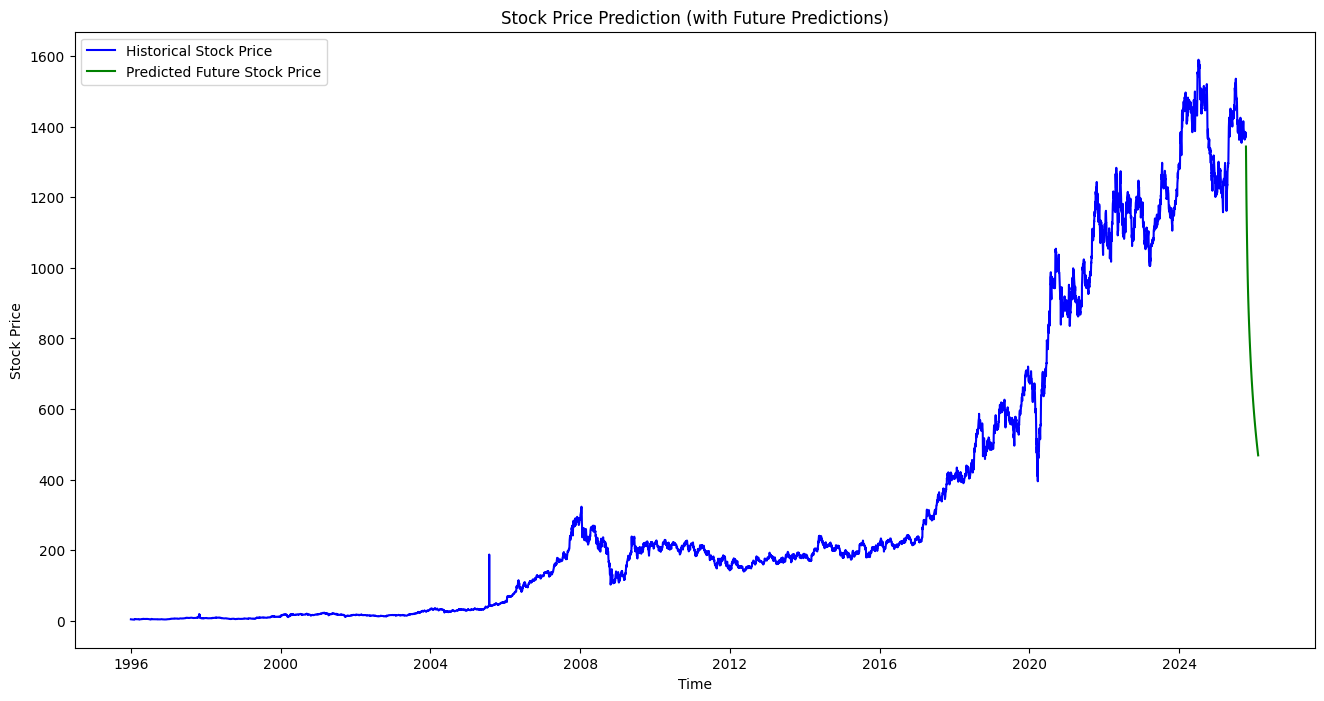

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Combine historical actual prices with future predictions for plotting
# We need to align the predictions with the dates
# Create a date range for the future predictions starting from the day after the last historical date
last_historical_date = stock_data.index[-1]
future_dates = pd.date_range(start=last_historical_date + pd.Timedelta(days=1), periods=120, freq='D')

# Create a pandas Series for future predictions with the future dates as index
future_predictions_series = pd.Series(future_predictions.flatten(), index=future_dates)

# Plot the historical actual prices and the future predictions
plt.figure(figsize=(16, 8))
plt.title('Stock Price Prediction (with Future Predictions)')
plt.xlabel('Time')
plt.ylabel('Stock Price')

# Plot historical data
plt.plot(stock_data.index, scaler.inverse_transform(scaled_data), color='blue', label='Historical Stock Price')

# Plot future predictions
plt.plot(future_predictions_series.index, future_predictions_series.values, color='green', label='Predicted Future Stock Price')

plt.legend()
plt.show()